In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
data = boston.data
feature_names = boston.feature_names
target = boston.target

In [4]:
X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = pd.DataFrame(target, columns = ['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [9]:
scaler = StandardScaler()

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [12]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [13]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [14]:
from matplotlib import pyplot as plt

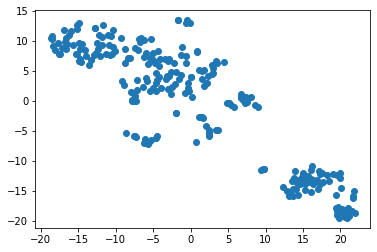

In [15]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [16]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans(n_clusters=2)

In [18]:
labels_train = km.fit_predict(X_train_scaled)

In [19]:
pd.value_counts(labels_train)

0    152
1    101
dtype: int64

Text(8, -10, 'Кластер 1')

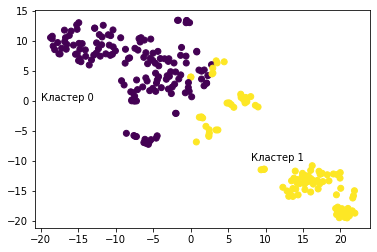

In [20]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-20, 0, 'Кластер 0')
plt.text(8, -10, 'Кластер 1')

In [21]:
y_train.mean()

price    22.748617
dtype: float64

In [22]:
y_train[labels_train==0].mean()

price    26.869737
dtype: float64

In [23]:
y_train[labels_train==1].mean()

price    16.546535
dtype: float64

Text(0.5, 0, 'Цена')

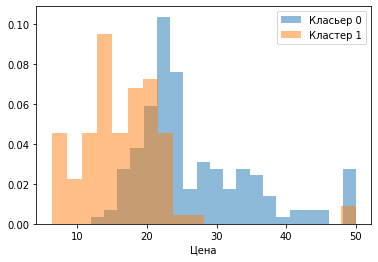

In [26]:
plt.hist(y_train[labels_train==0], bins = 20, density=True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density=True, alpha=0.5)
plt.legend(['Класьер 0', 'Кластер 1'])
plt.xlabel('Цена')

In [29]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.2337421710526316

In [31]:
X_train.loc[labels_train==1, 'CRIM'].mean()

8.28124702970297

Text(0.5, 0, 'CRIM')

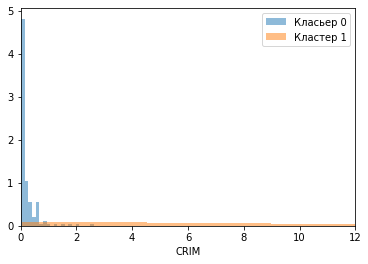

In [33]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins = 20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins = 20, density=True, alpha=0.5)
plt.xlim(0, 12)
plt.legend(['Класьер 0', 'Кластер 1'])
plt.xlabel('CRIM')

In [34]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

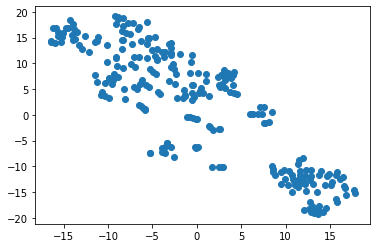

In [35]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])

In [36]:
labels_test = km.fit_predict(X_test_scaled)

In [37]:
pd.value_counts(labels_test)

0    168
1     85
dtype: int64

Text(8, -10, 'Кластер 1')

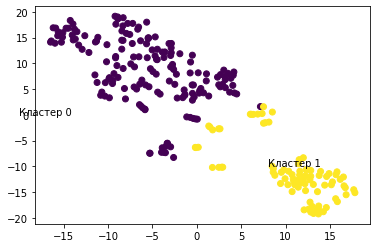

In [38]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.text(-20, 0, 'Кластер 0')
plt.text(8, -10, 'Кластер 1')

In [39]:
y_test.mean()

price    22.316996
dtype: float64

In [44]:
y_test[labels_test==0].mean()

price    25.209524
dtype: float64

In [43]:
y_test[labels_test==1].mean()

price    16.6
dtype: float64

Text(0.5, 0, 'Цена (тест нд)')

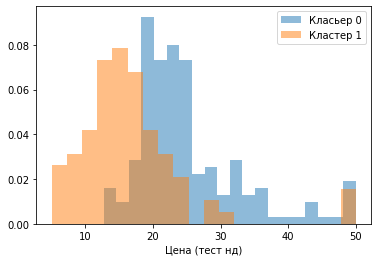

In [45]:
plt.hist(y_test[labels_test==0], bins = 20, density=True, alpha=0.5)
plt.hist(y_test[labels_test==1], bins = 20, density=True, alpha=0.5)
plt.legend(['Класьер 0', 'Кластер 1'])
plt.xlabel('Цена (тест нд)')

In [46]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.28237309523809523

In [47]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.69493505882353

Text(0.5, 0, 'CRIM')

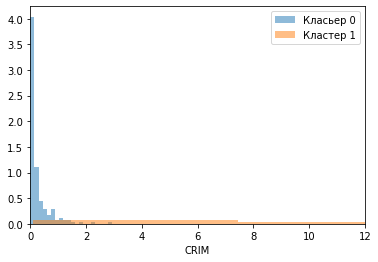

In [48]:
plt.hist(X_test.loc[labels_test==0, 'CRIM'], bins = 20, density=True, alpha=0.5)
plt.hist(X_test.loc[labels_test==1, 'CRIM'], bins = 20, density=True, alpha=0.5)
plt.xlim(0, 12)
plt.legend(['Класьер 0', 'Кластер 1'])
plt.xlabel('CRIM')